## Continuous Assessment II - Machine Learning Module

# Comparative Analysis of Patient's No-Show using Machine Learning algorithms
## KNN _vs_ Naive Bayes

### Lecturer: **David McQuaid**

#### Student: **Lais Carvalho** | student ID: 2019435

#### Date: April | 2021

## Notebook's Overview

This Jupyter Notebook constains the answers for the Continous Assessment II worth 40% of the final grade for Year 4 of the module Machine Learning for the course of Computing and Multimedia at CCT College Dublin.

The motivation behind this analysis is to corroborate the following hypothesis:
**Can we predict if a patient won’t show (no show) for an appointment?**


### Table of Contents

add ToC

## Summary
This report is divided in X parts:
1. Report
2. Data Viz
3. Machine Learning

# Report

## The problem
It is estimated that 30% of people make an appointment and do not show up. This can cause loads of issues but mainly causes money problems. Tis report aims to present the data analysis for such phenomenon.

## The Data
> The data comes from [here](https://github.com/dovidburns/Doctor_Appointment_No_Shows/blob/master/Report_On_Predicting_Appointment_No_Show.pdf). `Describe the dataset` part.

The data used in this sample is obtained for the city of Vitoria, Brazil from [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments).

The dataset is one of the featured dataset of Kaggle and initially included 14 variables with close to 110,000 observations of total patient appointments gathered from various hospitals of the city. The neighbourhood variable displays the region where the hospital is located. The data is real (not simulated) from the appointment histories of the hospitals.

The data was initially posted on May, 2016 and last updated on August, 2017.

### Data Glossary (add more info about the featured columns)
+ `PatientId`:
+ `AppointmentID`:
+ `Gender`:
+ `ScheduledDay`:
+ `AppointmentDay`:
+ `Age`:
+ `Neighbourhood`:
+ `Scholarship`: this attribute indicates that the family receives social welfare from the Brazilian government. Families of very low-income may receive this benefit if their children is going to school and on schedule with their vaccinations.
+ `Hipertension`:
+ `Diabetes`:
+ `Alcoholism`:
+ `Handcap`:
+ `SMS_received`:
+ `No-show`:

## Desireable aditional data
It would have been useful to learn about the type of apointment, etc. (also on the report).

# Exploratory Data Anaysis (EDA)

In [1]:
# supresses all warnings from notebook cells
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
# load the data
df_raw = pd.read_csv('./data/Medical Appointment No Shows.csv')

In [4]:
# verify if the data has loaded | print the 5 first records in the dataset
df_raw.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Missing Values

<AxesSubplot:>

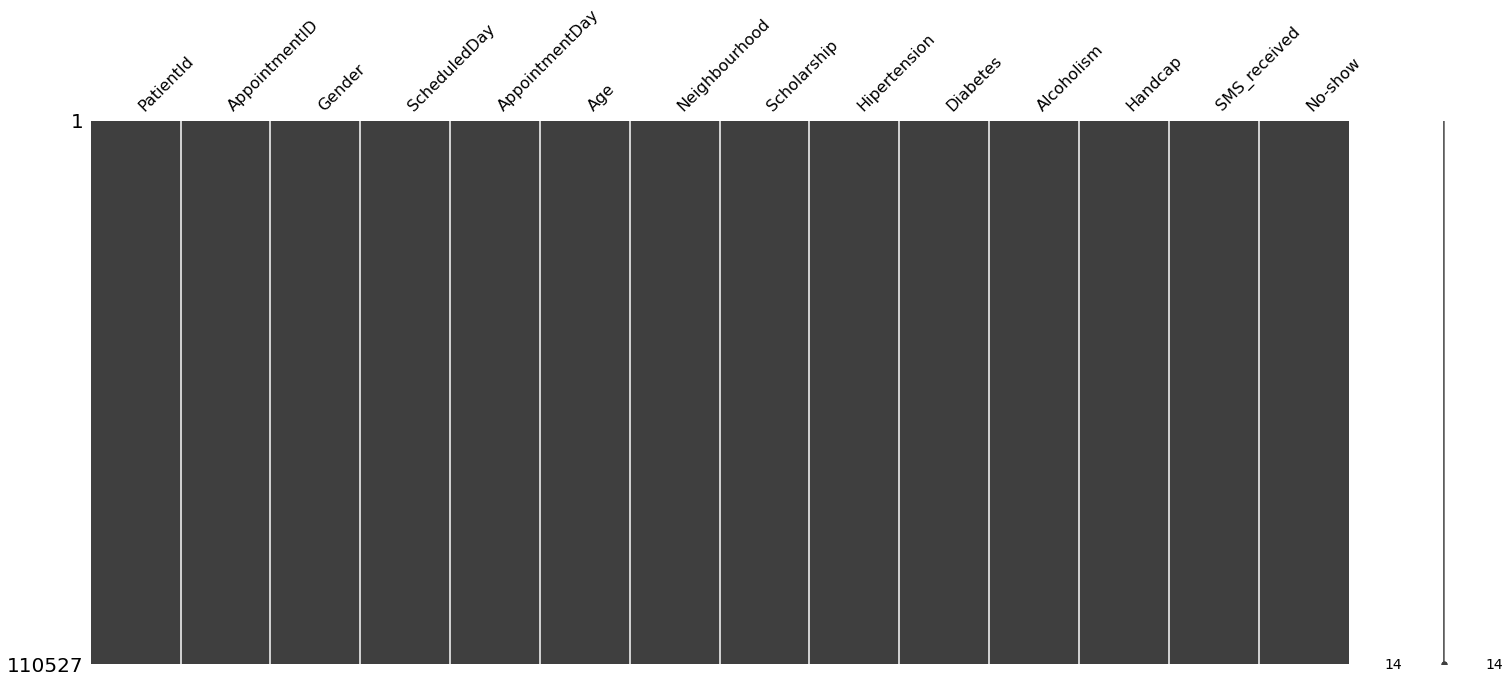

In [5]:
msno.matrix(df_raw)

As it is possible to visualise by the plot above, the dataset given has **no missing values**.

Further checks will scrutinise the memory usage of the dataset, typos on columns headings, the need to convert features from categorical to numerical values, etc.

In [6]:
# describes the values on the dataset
df_raw.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Here it is possible to see that the feature `age` has a minimum value of `-1`, which is not valid since ages are integer and non-negative numbers. I will assume the entry is a mistake, and replace the  wrong input by a `not a number` value.
> NOTE: As described [here](https://pandas.pydata.org/docs/user_guide/missing_data.html#values-considered-missing), by default, Pandas uses `NaN` values to represent missing data and these columns become of the type `float`.

In [7]:
# replace '-1' for NaN on `Age` column
df_new = df_raw.Age.loc[(df_raw.Age < 0)] = None

In [8]:
# selecting the row with replaced value to check if it worked (it did!; Age is equal to `NaN` now)
df_raw.loc[99832]

PatientId            465943158731293.0
AppointmentID                  5775010
Gender                               F
ScheduledDay      2016-06-06T08:58:13Z
AppointmentDay    2016-06-06T00:00:00Z
Age                                NaN
Neighbourhood                    ROMÃO
Scholarship                          0
Hipertension                         0
Diabetes                             0
Alcoholism                           0
Handcap                              0
SMS_received                         0
No-show                             No
Name: 99832, dtype: object

In [9]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110526 non-null  float64
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(2), int64(7), object(5)
memory usage: 11.8+ MB


In [25]:
# function to convert features to integers
def convert_to_int(val):
    """
    Convert the string number value to a integer (int64)
    """
    new_val = val
    return int(new_val)

In [11]:
df_raw['PatientId'] = df_raw['PatientId'].apply(convert_to_int)

In [26]:
# convert object fields to `category` type to save memory (not used since converting it increses the dataset memory size in 2Mb)
# df_raw[df_raw.select_dtypes(['object']).columns] = df_raw.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [13]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  int64  
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110526 non-null  float64
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [19]:
# convert AppointmentDay to datetime (has timestamp of 00:00 so it can be ignored)
df_raw['AppointmentDay'] = pd.to_datetime(df_raw['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [24]:
# convert `No-Show` feature to two distinct columns (dummy variables) where `1` indicates `True` and `0` indicates `False`
df_new = pd.get_dummies(df_raw, columns=['No-show'])
df_new.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show_No,No-show_Yes
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29,62.0,JARDIM DA PENHA,0,1,0,0,0,0,1,0
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29,56.0,JARDIM DA PENHA,0,0,0,0,0,0,1,0
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29,62.0,MATA DA PRAIA,0,0,0,0,0,0,1,0
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29,56.0,JARDIM DA PENHA,0,1,1,0,0,0,1,0


In [16]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  int64  
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110526 non-null  float64
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show_No      110527 non-null  uint8  
 14  No-show_Yes     110527 non-null  uint8  
dtypes: float64(1), int64(8), object(4), uint8(2)
memory usage: 11.2+ MB


In [22]:
# rename column headers 
df_new = df_new.rename(columns={'PatientId': 'PatientID', 'Scholarship': 'Welfare_beneficiary', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show_No': 'Show', 'No-show_Yes': 'NoShow'})

In [23]:
df_new.head(15)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Welfare_beneficiary,Hipertension,Diabetes,Alcoholism,Handicap,SMSReceived,Show,NoShow
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29,62.0,JARDIM DA PENHA,0,1,0,0,0,0,1,0
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29,56.0,JARDIM DA PENHA,0,0,0,0,0,0,1,0
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29,62.0,MATA DA PRAIA,0,0,0,0,0,0,1,0
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29,56.0,JARDIM DA PENHA,0,1,1,0,0,0,1,0
5,95985133231274,5626772,F,2016-04-27T08:36:51Z,2016-04-29,76.0,REPÚBLICA,0,1,0,0,0,0,1,0
6,733688164476661,5630279,F,2016-04-27T15:05:12Z,2016-04-29,23.0,GOIABEIRAS,0,0,0,0,0,0,0,1
7,3449833394123,5630575,F,2016-04-27T15:39:58Z,2016-04-29,39.0,GOIABEIRAS,0,0,0,0,0,0,0,1
8,56394729949972,5638447,F,2016-04-29T08:02:16Z,2016-04-29,21.0,ANDORINHAS,0,0,0,0,0,0,1,0
9,78124564369297,5629123,F,2016-04-27T12:48:25Z,2016-04-29,19.0,CONQUISTA,0,0,0,0,0,0,1,0


## Pandas Profilling

In [17]:
from pandas_profiling import ProfileReport

In [27]:
profile = ProfileReport(df_new, title="Pandas Profiling Report")
profile.to_widgets()

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Visualization

# Machine Learning

## Pre-processing

## Models

### Classification - K-Nearest Neighbours

### Classification - Naive Bayes

### Prediction - KNN _vs_ Naive Bayes

#### Acuracy

#### Error

# References
- https://www.kaggle.com/samratp/predict-show-noshow-eda-visualization-model
- https://www.jeremyjordan.me/preparing-data-for-a-machine-learning-model/
- https://www.kaggle.com/samratp/predict-show-noshow-eda-visualization-model
- https://www.kaggle.com/somrikbanerjee/predicting-show-up-no-show
- https://www.kaggle.com/joniarroba/noshowappointments
- https://www.kaggle.com/ravishkalra/medical-appointment-no-show-prediction
- https://www.linkedin.com/pulse/how-predict-no-show-analysis-appointment-rates-brazilian-burns/
    - https://github.com/dovidburns/Doctor_Appointment_No_Shows/blob/master/Report_On_Predicting_Appointment_No_Show.pdf
- https://medium.com/analytics-vidhya/no-shows-prediction-at-hospital-clinics-d6fe00165842